# Li-2015 - A DataJoint example
The data and results presented in this notebook pertain to the paper:

>Nuo Li, Tsai-Wen Chen, Zengcai V. Guo, Charles R. Gerfen & Karel Svoboda. "A motor cortex circuit for motor planning and movement" (2015) Nature (https://dx.doi.org/10.1038/nature14178)

This notebook provide demonstrations of working with a DataJoint data pipeline in querying data, apply data conditioning and reproduce some key figures in the paper. The orignal data , in NWB 2.0 format, had been ingested into a DataJoint data pipeline (data pipeline schema is given below). As a validation of complete ingestion of the original data into DataJoint, figures 2b, 2c, and extended figure 2 will be reproduced in this example.

In [1]:
import datajoint as dj
dj.conn().connect()

Please enter DataJoint username: root
Please enter DataJoint password: ········
Connecting root@localhost:3306


In [2]:
%matplotlib inline
import os
os.chdir('..')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, psth
from pipeline.plot import unit_characteristic_plot, unit_psth

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Single unit PSTH - Figure 2b

#### Sample neurons

In [56]:
units = ephys.Unit & [{'subject_id': 218457, 'session': 4, 'unit': 9},
                      {'subject_id': 219248, 'session': 2, 'unit': 1},
                      {'subject_id': 219037, 'session': 2, 'unit': 5},
                      {'subject_id': 219031, 'session': 2, 'unit': 17},
                      {'subject_id': 210862, 'session': 2, 'unit': 21},
                      {'subject_id': 210863, 'session': 2, 'unit': 10},
                      {'subject_id': 210863, 'session': 1, 'unit': 9},
                      {'subject_id': 219033, 'session': 5, 'unit': 1},
                      {'subject_id': 219036, 'session': 5, 'unit': 13}]

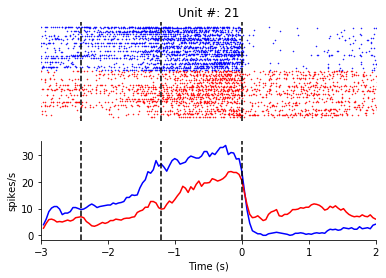

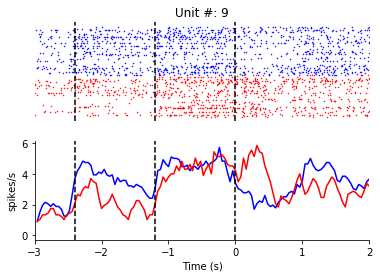

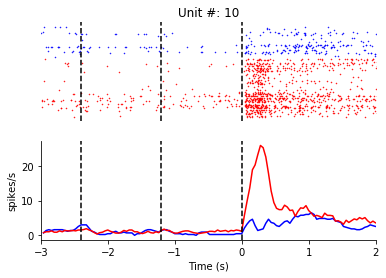

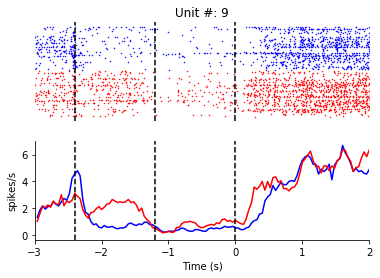

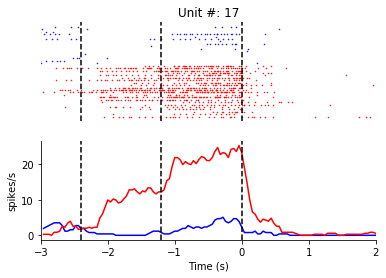

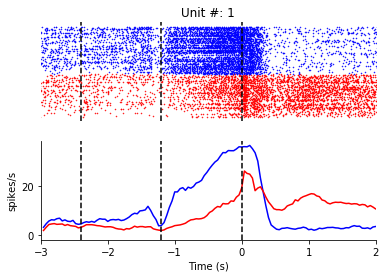

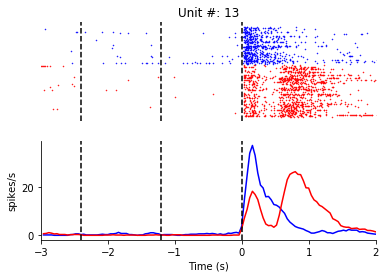

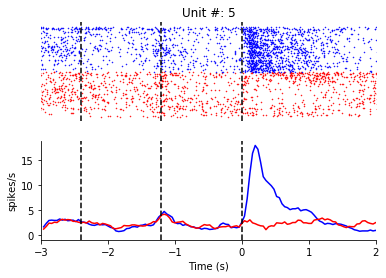

In [57]:
for k in units.fetch('KEY'):
    unit_psth.plot_unit_psth(k)

## Single unit PSTH - supplemental Figure 2

In [54]:
units = ephys.Unit & [{'subject_id': 214430, 'session': 2, 'unit': 4},
                      {'subject_id': 218457, 'session': 1, 'unit': 1},
                      {'subject_id': 210863, 'session': 1, 'unit': 7},
                      {'subject_id': 219033, 'session': 4, 'unit': 5},
                      {'subject_id': 210862, 'session': 2, 'unit': 16},
                      {'subject_id': 210861, 'session': 2, 'unit': 5},
                      {'subject_id': 210863, 'session': 1, 'unit': 10},
                      {'subject_id': 218457, 'session': 3, 'unit': 3},
                      {'subject_id': 219031, 'session': 5, 'unit': 3},
                      {'subject_id': 210863, 'session': 2, 'unit': 10},
                      {'subject_id': 219033, 'session': 3, 'unit': 5},
                      {'subject_id': 218457, 'session': 4, 'unit': 12},
                      {'subject_id': 219247, 'session': 1, 'unit': 3},
                      {'subject_id': 219248, 'session': 2, 'unit': 11},
                      {'subject_id': 210862, 'session': 2, 'unit': 4},
                      
                      {'subject_id': 219248, 'session': 1, 'unit': 11},
                      {'subject_id': 219031, 'session': 5, 'unit': 4},
                      {'subject_id': 219031, 'session': 2, 'unit': 14},
                      {'subject_id': 210863, 'session': 3, 'unit': 33},
                      {'subject_id': 219030, 'session': 5, 'unit': 8}]

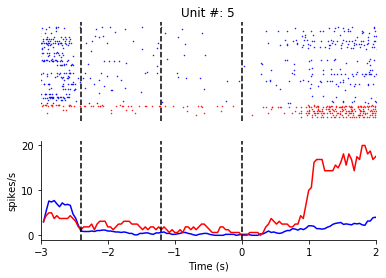

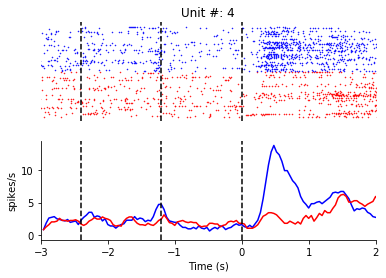

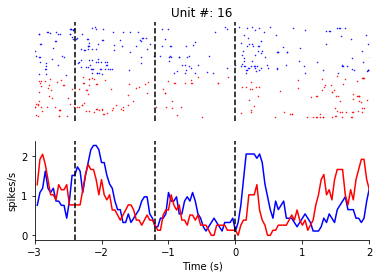

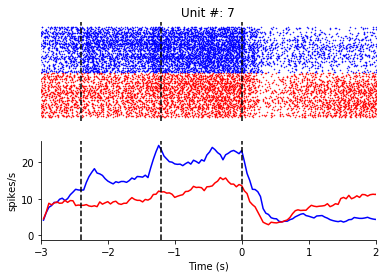

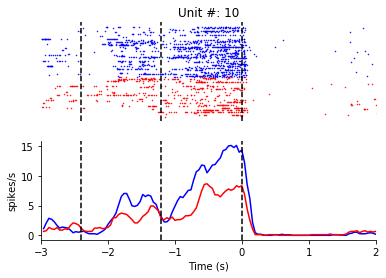

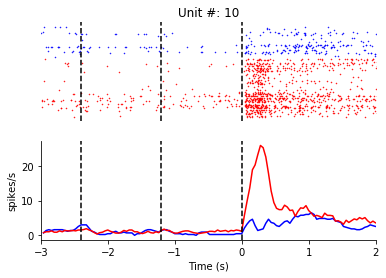

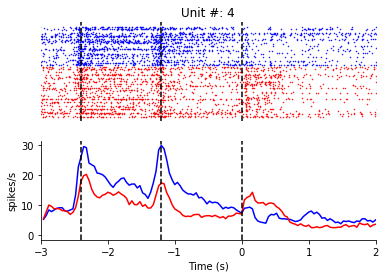

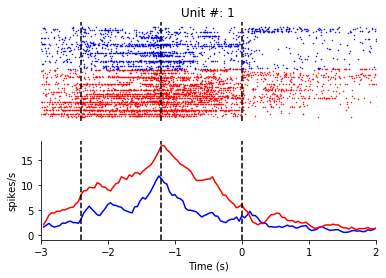

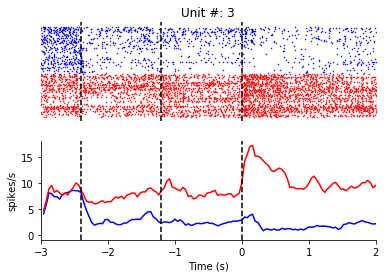

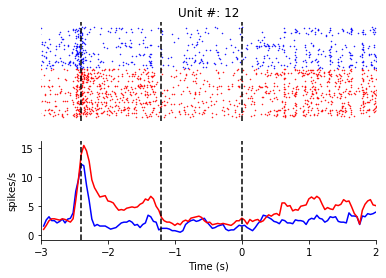

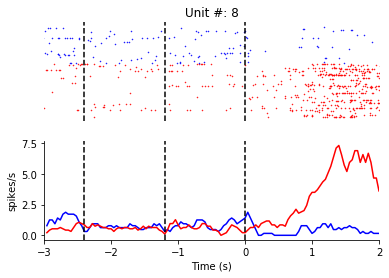

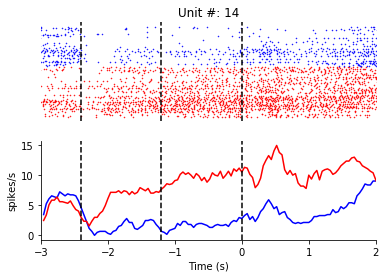

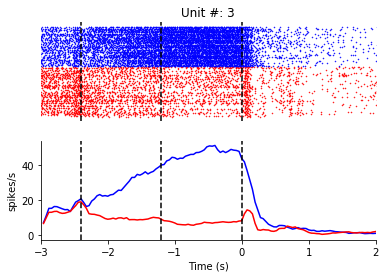

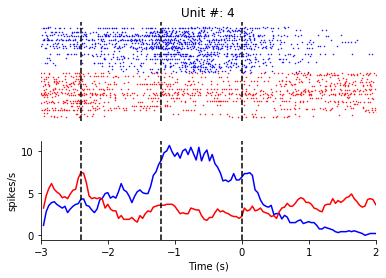

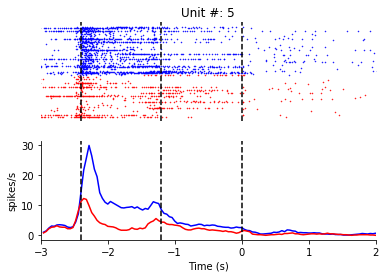

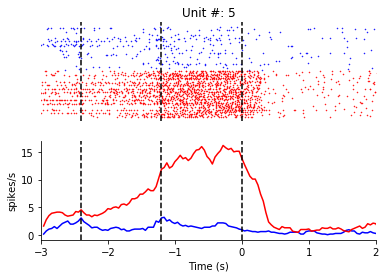

In [55]:
for k in units.fetch('KEY'):
    unit_psth.plot_unit_psth(k)

## Group-level unit PSTH with selectivity - Figure 2c

In [42]:
units = (ephys.Unit & (ephys.ProbeInsertion.InsertionLocation
                       * experiment.BrainLocation  & {'brain_area': 'M2', 'hemisphere': 'left'}))

In [43]:
units = units * ephys.UnitCellType * psth.UnitSelectivity & 'cell_type = "Pyr"' & 'unit_selectivity != "non-selective"'

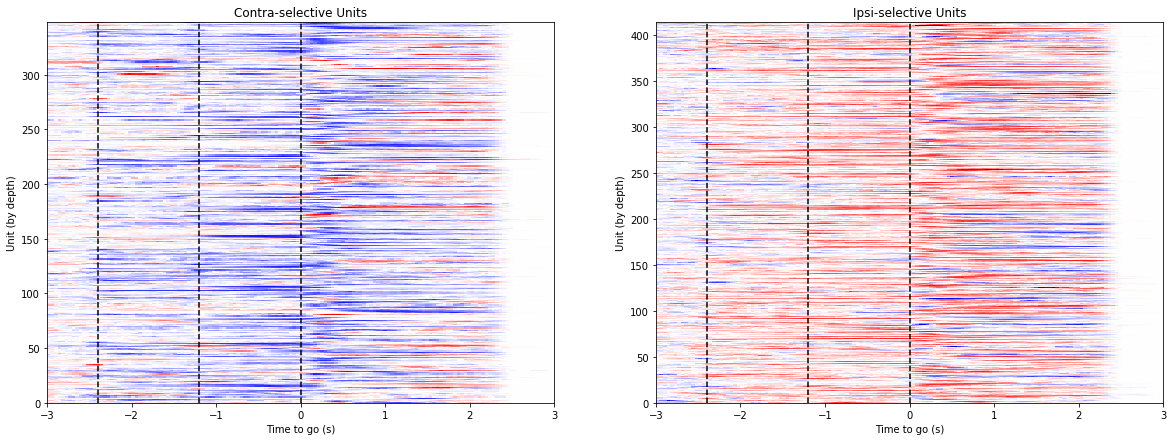

In [45]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(units)

# =====================================

In [53]:
import importlib
importlib.reload(unit_psth)
importlib.reload(unit_characteristic_plot)

<module 'pipeline.plot.unit_characteristic_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\NWB_Janelia\\Li-2015a\\pipeline\\plot\\unit_characteristic_plot.py'>